In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.kernel_approximation import RBFSampler
import pyov2sgd

In [2]:
p = 7
order = 1
# np.random.seed(0)
A = np.zeros((p, p, order))
n_interraction = 10
eig_wrong = True
while (A != 0).sum() != n_interraction or eig_wrong:
#     A = np.eye(p)
    i1 = np.random.randint(0, p)
    i2 = np.random.randint(0, p)
    op = np.random.randint(0, order)
    A[i1, i2, op] = np.random.normal(0, 0.04)
    eig_wrong = False
    for i in range(order):
        eig_wrong = eig_wrong or (np.abs(np.linalg.eigvals(A[:, :, i])) >= 1).any()
        
# for i in range(p):
#     A[i, :] = A[i, :] / np.linalg.norm(A[i, :])
# A = A / np.linalg.norm(A)
# A = np.eye(p)


In [3]:
plt.figure(figsize=(order * 2, 2))
for i in range(order):
    print np.linalg.eigvals(A[:, :, i])
    plt.subplot(1, order, i + 1)
    plt.pcolor(A[:, :, i], cmap='Greys')

plt.figure(figsize=(2, 2))
plt.pcolor(np.sum(A, axis=2), cmap='Greys')

SyntaxError: invalid syntax (<ipython-input-3-8d8d42b63b8b>, line 3)

In [4]:
#### D = 5000
# gamma = .8
# np.random.seed(0)
# phi = RBFSampler(gamma=gamma, n_components=D, random_state=0)
# theta = 2 * np.random.normal(0, 0.04, (D, p) - 1

# A[:, :, 0] = np.eye(p)
# print A[:, :, 0]

T = 1000
serie = np.empty((T, p))
for i in range(order):
    serie[i, :] = np.random.normal(0, 1., p)
for t in range(order, T):
    serie[t, :] = 0
    for i in range(order):
        serie[t, :] = serie[t, :] + np.dot(np.eye(p), serie[t - i - 1, :])
    serie[t, :] = serie[t, :] + np.random.normal(0, 1., p)

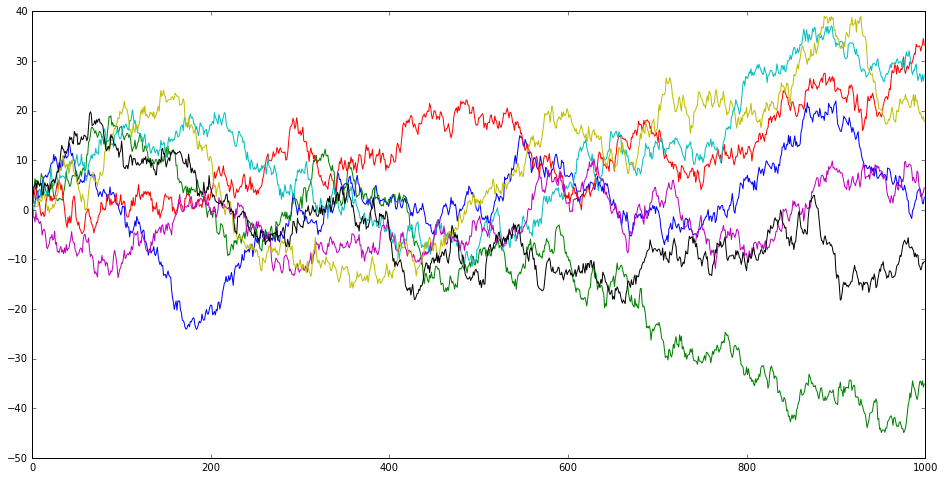

In [5]:
plt.figure(figsize=(16, 8))
plt.plot(np.arange(0, T, 1), serie)

In [6]:
X = serie[:-1, :].copy()
y = serie[1:, :].copy()

In [18]:
# G = np.eye(p)
# G = np.sum(A, axis=2)
# G = np.dot(G, G.T)
eta0 = 1.
lbda = 0.
nu = .0
batch = X.shape[0]
block = 25
cond = 1e-10
cap = -1
T = 50
L = pyov2sgd.RidgeLoss()
B = pyov2sgd.DecomposableGaussian(np.eye(p), 50.)
C = pyov2sgd.InverseScaling(eta0, 0, 0)

# estimator = pyov2sgd.BDSOVK(L, B, C, lbda, nu, T, p, batch, block, cap, cond)
estimator = pyov2sgd.DSOVK(L, B, C, p, lbda, nu, T, batch, block, cap, cond)
start = time.time()
estimator.fit_dense(X, y)
stop = time.time()
print (3, 'T fit: ', stop - start)

3 T fit:  5.854365110397339


0.817444432491


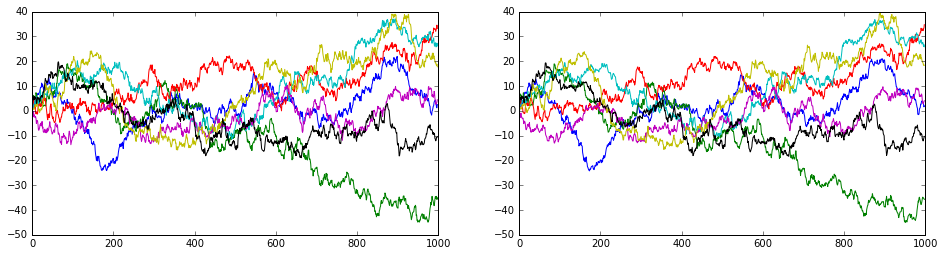

In [19]:
yp = estimator.predict_dense(serie[:-1, :])
print(np.mean((yp - serie[1:, :]) ** 2))

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, 999, 1), serie[1:, :])

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, 999, 1), yp)

In [222]:
# G = np.eye(p)
G = np.sum(A, axis=2)
G = np.dot(G, G.T)
eta0 = 1.
lbda = 0.
nu = .0
batch = X.shape[0]
block = 25
cond = 1e-10
cap = -1
T = 50
L = pyov2sgd.RidgeLoss()
B = pyov2sgd.TransformableGaussian(.001)
C = pyov2sgd.InverseScaling(eta0, 0, 0)

estimator = pyov2sgd.TSOVK(L, B, C, p, lbda, nu, T, batch, block, cap, cond)
start = time.time()
estimator.fit_dense(X, y)
stop = time.time()
print (3, 'T fit: ', stop - start)

(3, 'T fit: ', 11.674939155578613)


0.794319103426


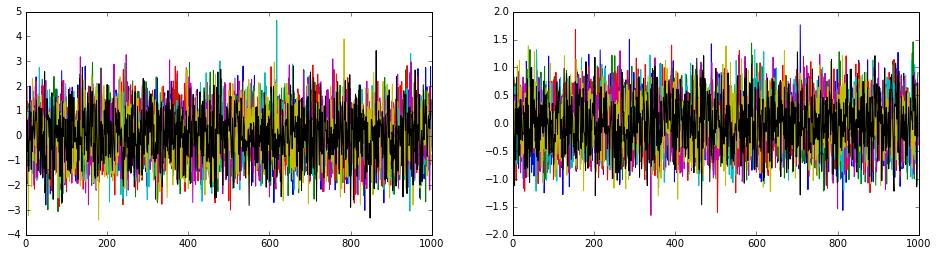

In [223]:
yp = estimator.predict_dense(serie[:-1, :])
print np.mean((yp - serie[1:, :]) ** 2)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, 999, 1), serie[1:, :])

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, 999, 1), yp)

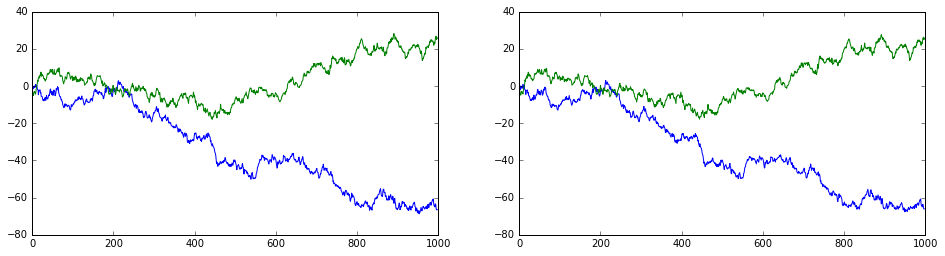

In [300]:
eps = 1e-10
J = np.zeros((p, p, 1000))
for t in range(1000):
    J[:, :, t] = np.vstack(((estimator.predict_dense(serie[t, :].reshape(1, -1) + eps * np.eye(p)[i, :]) - 
                             estimator.predict_dense(serie[t, :].reshape(1, -1))) / eps for i in range(p)))

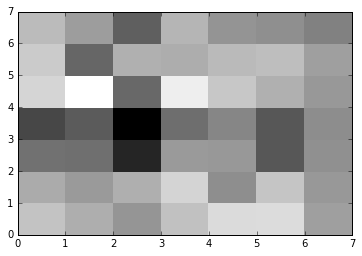

In [301]:
JS = np.mean(np.abs(J), axis=2)
plt.pcolor(JS, cmap='Greys')

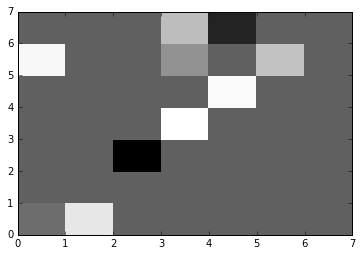

In [303]:
plt.pcolor(A[:, :, 0], cmap='Greys')

In [304]:
JS

array([[ 7.54440843,  7.72660522,  7.90808206,  7.56337959,  7.28298499,
         7.27814987,  7.83691745],
       [ 7.74402524,  7.87536014,  7.71202155,  7.37075964,  7.97613863,
         7.52840721,  7.88814048],
       [ 8.21294035,  8.22981818,  8.79370125,  7.87267264,  7.89219292,
         8.45081241,  7.95350091],
       [ 8.56432564,  8.41704204,  9.09386276,  8.2429151 ,  8.03701548,
         8.45102891,  7.97848379],
       [ 7.3488447 ,  6.71314972,  8.29845565,  7.03814731,  7.50360435,
         7.70817148,  7.89253667],
       [ 7.46362712,  8.31711184,  7.70097357,  7.73489249,  7.62922618,
         7.60112496,  7.83370863],
       [ 7.62434654,  7.8532209 ,  8.38698351,  7.67006086,  7.91610351,
         7.96506906,  8.0876565 ]])

In [57]:
s = estimator.coefs().shape
c = estimator.coefs().reshape((p, s[1] / p))

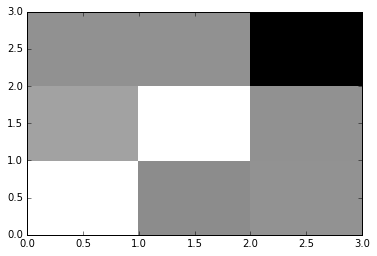

In [58]:
plt.pcolor(np.linalg.svd(c)[0], cmap='Greys')

In [615]:
phi = RBFSampler(n_components=100, random_state=0)

In [616]:
R = np.empty((p, p))
AA = np.ones((p, p))

In [617]:
t1 = np.vstack((phi.fit_transform(serie[0, j]) for j in range(p)))
t2 = np.vstack((phi.fit_transform(serie[1, j]) for j in range(p)))
k = np.vstack((np.hstack((AA[i, j] * np.exp(-np.linalg.norm(serie[0, i] - serie[1, j]) ** 2) for i in range(p))) for j in range(p)))
np.linalg.norm(np.dot(t1, t2.T) - k)

3.341533068345155

In [545]:
phi.fit_transform(serie[0, j])

array([[  1.29801861e-02,   1.03050211e-02,   3.70525383e-02,
         -4.26059332e-02,   1.94615105e-02,   9.21595689e-03,
          1.90649509e-02,   4.47041150e-02,   4.46640953e-02,
         -4.05647818e-02,   2.73213235e-02,   1.89355257e-02,
          3.15671700e-02,   3.75447221e-02,   2.83993874e-02,
          4.45331571e-02,  -3.10351609e-02,  -4.45569609e-02,
          4.25237074e-02,   9.51672961e-03,   3.37039448e-02,
         -4.31634592e-02,   4.29461952e-02,  -3.00618951e-02,
         -6.15173132e-03,   4.30993791e-02,  -5.03258338e-03,
         -4.46629987e-02,   4.36785990e-02,  -4.71793003e-03,
         -6.28101238e-03,   2.91332341e-02,   4.42579225e-02,
          4.21713244e-02,  -2.36282266e-02,  -8.33339332e-03,
         -4.13953344e-02,  -4.12483197e-02,  -6.21347178e-03,
         -1.41266839e-03,  -2.65107322e-02,   5.15837606e-03,
         -1.12562045e-02,   1.19002082e-02,  -2.47989606e-02,
         -3.71435572e-02,  -4.12893538e-02,   4.10691609e-02,
        